# Практическое задание к уроку 2 "Сверточные нейронные сети (СНС)"

Реализовать и обучить (с нуля) СНС для задачи классификации изображений на датасете CIFAR-10
Библиотеки: [Python, Tensorflow]

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
train, test = tf.keras.datasets.cifar10.load_data()

train_x, train_y = train
test_x, test_y = test

train_x = train_x.reshape(-1, 32, 32, 3).astype(np.float32) / 255.
test_x = test_x.reshape(-1, 32, 32, 3).astype(np.float32) / 255.
train_y = train_y.astype(np.int32)
test_y = test_y.astype(np.int32)

print(train_x.shape, train_x.dtype)
print(test_x.shape, test_x.dtype)
print(train_y.shape, train_y.dtype)
print(test_y.shape, test_y.dtype)

170500096/170498071 [==============================] - 535s 3us/step
(50000, 32, 32, 3) float32
(10000, 32, 32, 3) float32
(50000, 1) int32
(10000, 1) int32


In [4]:
classes = {
  0: 'airplane',
  1: 'automobile',
  2: 'bird',
  3: 'cat',
  4: 'deer',
  5: 'dog',
  6: 'frog',
  7: 'horse',
  8: 'ship',
  9: 'truck',
}

In [9]:
EPOCH_QUANTITY = 4
BATCH_SIZE = 256

ds_train = tf.data.Dataset.from_tensor_slices((train_x, train_y))

ds_train = ds_train.shuffle(buffer_size=train_x.shape[0])

ds_train = ds_train.repeat(EPOCH_QUANTITY)
ds_train = ds_train.batch(BATCH_SIZE)

In [5]:
dropout_layer = tf.keras.layers.Dropout(.2, input_shape=(2,))

In [6]:
def make_model():
  # Model Type
  model = models.Sequential()
  
  # Processing Layers
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.Flatten())
  
  # Dropout
  model.add(dropout_layer)
  
  # Denses
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  
  # Metrics
  model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
  )

  return model

In [7]:
model = make_model()

In [10]:
history = model.fit(
  train_x,
  train_y,
  epochs=EPOCH_QUANTITY, 
  validation_data=(test_x, test_y)
)

Epoch 1/4


/Users/tombelov/opt/miniconda3/lib/python3.9/site-packages/tensorflow/python/keras/backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


1563/1563 [==============================] - 41s 26ms/step - loss: 1.4006 - accuracy: 0.4933 - val_loss: 1.0589 - val_accuracy: 0.6179
Epoch 2/4
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9983 - accuracy: 0.6439 - val_loss: 0.9258 - val_accuracy: 0.6727
Epoch 3/4
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8314 - accuracy: 0.7080 - val_loss: 0.8617 - val_accuracy: 0.7024
Epoch 4/4
1563/1563 [==============================] - 40s 26ms/step - loss: 0.7148 - accuracy: 0.7486 - val_loss: 0.8086 - val_accuracy: 0.7235


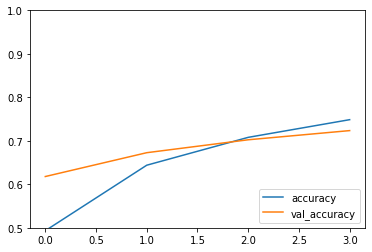

In [11]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.ylim([0.5, 1])

plt.legend(loc='lower right')

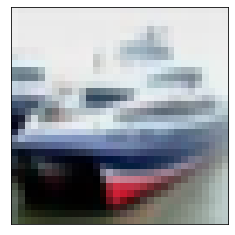

Предсказание: 8 ship


In [18]:
image = test_x[1, ...]

logits = model(image[None, ...])[0]
prediction = tf.nn.softmax(logits)
ans = np.argmax(prediction)

fig = plt.figure(figsize=(12,4))

plt.imshow(image[:,:,:])
plt.xticks([]), plt.yticks([])

plt.show()
print(f'It\'s a': {ans} {classes[ans]}')

'ship'